In [1]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import plotly.graph_objects as go

## Read file

In [2]:
df_read = pd.read_csv('Doc/DIG_2021_0016_Bedrock.csv')

In [11]:
df_read.shape

(8847, 11)

In [10]:
df_read.head(3)

,Loc_ID,E_10TM83,N_10TM83,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,El_masl28,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey


## Create a copy

In [4]:
df = df_read.copy(deep=True)

In [6]:
df.head(3)

,Loc_ID,E_10TM83,N_10TM83,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,El_masl28,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey


## Rename columns

In [9]:
# rename columns
df.rename(columns={'Loc_ID ':'Loc_ID','E_10TM83': 'Easting','N_10TM83': 'Northing','El_masl28':'Elevation','Geol_name':'Geol_name'  }, inplace=True)
df.head(3)

,Loc_ID,Easting,Northing,Geol_name,KB_masl28,Gd_el_m28,Gd_el_src,Elevation,Data_src,MD_m,Publisher
0,100160607211W400,711243.82,6120896.30,Bedrock top,644.8,641.3,Original from well log,495.8,Oil & gas well log,145.5,Alberta Geological Survey
1,100160907713W400,691910.46,6170207.23,Bedrock top,679.8,676.5,Original from well log,442.3,Oil & gas well log,234.2,Alberta Geological Survey
2,GJP_interpretative_points_471,659833.16,6269089.08,Bedrock top,-9999.0,386.1,Environment and Sustainable Development DEM,412.6,Outcrop; interpreted from satellite image...,0.0,Alberta Geological Survey


## Create a new dataframe filtered with the value ' Bedrock  top' from column 'Geol_name' 

In [13]:

bedrock = df.loc[df['Geol_name'] == ' Bedrock  top '][['Easting','Northing','Elevation']]

In [14]:
bedrock.shape

(8818, 3)

In [15]:
bedrock.head(3)

,Easting,Northing,Elevation
0,711243.82,6120896.30,495.8
1,691910.46,6170207.23,442.3
2,659833.16,6269089.08,412.6


## Crop the dataframe bedrock

In [16]:
# Create a function to crop the dataframe bedrock
def crop(dataframe, x_min,x_max,y_min,y_max):
    dataframe = dataframe.loc[(dataframe['Easting'] <= x_max) & (dataframe['Easting'] >= x_min)]
    dataframe = dataframe.loc[(dataframe['Northing'] <= y_max) & (dataframe['Northing'] >= y_min)]
    return dataframe

In [17]:
x_min,x_max,y_min,y_max = 750000,790000,6115896,6155896

In [18]:
# run function
cropped_df = crop(bedrock,x_min,x_max,y_min,y_max)

In [19]:
cropped_df.head(3)

,Easting,Northing,Elevation
387,777739.61,6141504.74,471.3
399,772090.21,6155709.35,469.8
412,763861.09,6147278.57,471.6


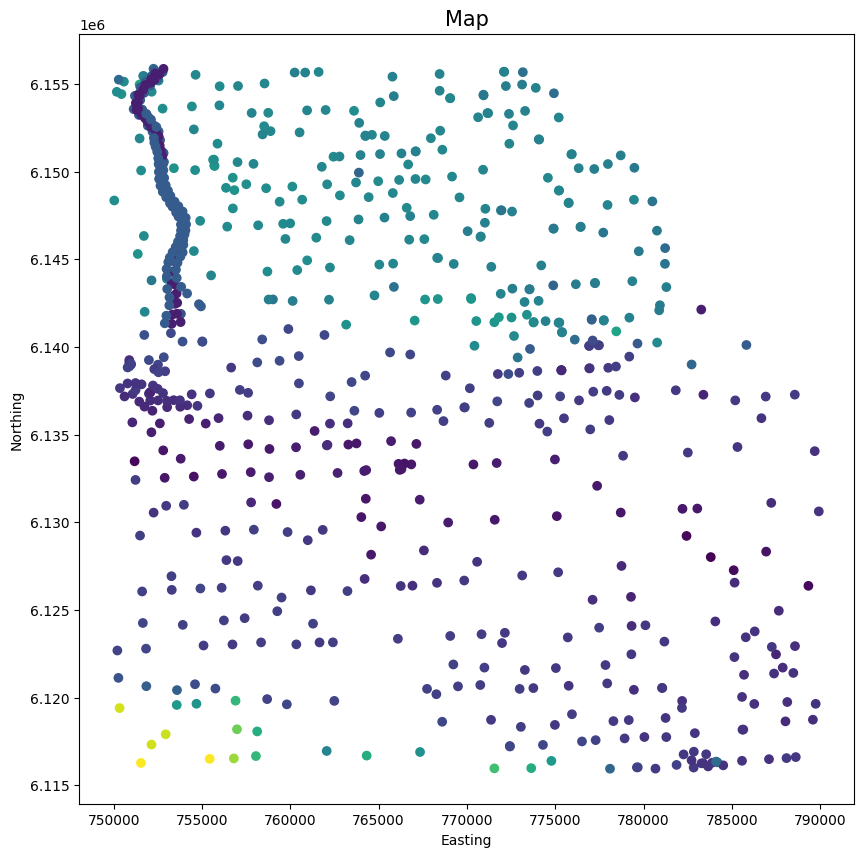

In [20]:
# Create a scatter plot with the values of bedrock dataframe
plt.figure(figsize=(10,10))
plt.scatter(cropped_df.Easting, cropped_df.Northing, c=cropped_df.Elevation)
plt.xlabel('Easting')
plt.ylabel('Northing')
plt.title('Map', fontsize=15)
plt.show()